In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('Categorical.csv')

In [3]:
data = raw_data.copy()

In [4]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


In [5]:
x = data_mapped.iloc[:,3:4]

In [6]:
kmeans = KMeans(4)
kmeans.fit(x)

/Users/paritp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [7]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/paritp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 1, 0, 0, 0, 0, 3, 1, 3, 2, 2, 2, 2, 0, 2, 0, 3, 1, 0, 1, 1,
       3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 1, 1,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 3, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 1, 1, 0, 0, 3, 1, 0, 0, 0,
       3, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 0, 3, 0, 3, 2, 1, 1, 0, 2, 1, 3,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 3, 2, 2, 3, 3, 0, 2, 1, 3, 2, 2, 0, 0,
       3, 0, 1, 3, 2, 3, 0, 0, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 0, 1, 1, 3, 3, 3, 3, 2, 0, 1,
       3, 3, 1, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 2, 2, 2, 3, 1, 1, 1],
      dtype=int32)

In [8]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,0
1,Afghanistan,66.004734,33.835231,2,3
2,Angola,17.537368,-12.293361,3,1
3,Anguilla,-63.064989,18.223959,0,0
4,Albania,20.049834,41.142450,1,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,2
237,Yemen,47.586762,15.909280,2,3
238,South Africa,25.083901,-29.000341,3,1
239,Zambia,27.774759,-13.458242,3,1


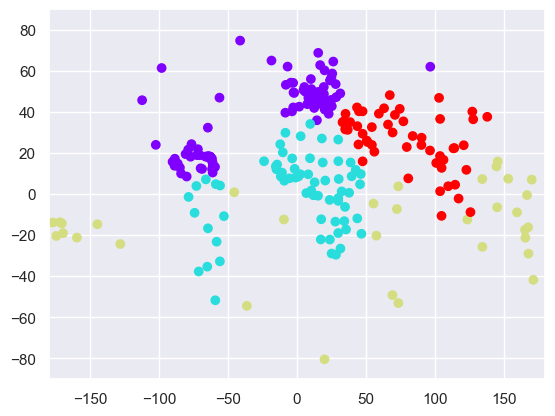

In [9]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()